In [2]:
import sys
import tweepy
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from wordcloud import WordCloud, STOPWORDS
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from credentials import *

In [4]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth)

In [23]:
tweets = api.user_timeline('@VIAJESPUNO', count=5, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

Tenemos las mejores ofertas de tour en el lago visiten.
https://t.co/CVRTEwB1cg

@PGATravel Amigos saludos desde Puno
Para Evelyn

@PGATravel Hola amigos como están como está Evelyn saludos desde Puno
Viajes Puno explorer

Paquetes x fiestas patrias consulte en .
viajespunoexplorer@gmail.com
Saludos

Tenemos ofertas por fiestas patrias  consulte en
viajespunoexplorer@gmail.com



In [6]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [24]:
user_id = 'VIAJESPUNO' 
count=200

In [26]:
tw_viajes = list_tweets(user_id, count)

In [27]:
type(tw_viajes)

list

In [28]:
tw_viajes

['Tenemos las mejores ofertas de tour en el lago visiten.\nhttps://t.co/CVRTEwB1cg',
 '@PGATravel Amigos saludos desde Puno\nPara Evelyn',
 '@PGATravel Hola amigos como están como está Evelyn saludos desde Puno\nViajes Puno explorer',
 'Paquetes x fiestas patrias consulte en .\nviajespunoexplorer@gmail.com\nSaludos',
 'Tenemos ofertas por fiestas patrias  consulte en\nviajespunoexplorer@gmail.com',
 'https://t.co/CVRTEwB1cg',
 'https://t.co/CVRTEwB1cg\nLes espera en puno',
 'https://t.co/JhIkYMoKbO',
 'https://t.co/nlMsfwXLal',
 '@Hotel_Los_Apus perfecto amigos\nestamos en contacto',
 'https://t.co/CVRTEwB1cg',
 'RT @VIAJESPUNO: lago titikaka es una maravilla visitar http://t.co/wxp8Pg1uA8',
 'estimados amigos\ntenemos ofertas especiales de tour en puno\npodran visitan lago tiitkaka y las chullpas de sillustani',
 'lago titikaka es una maravilla visitar http://t.co/wxp8Pg1uA8',
 'esperamos sus reservas\npara visitar el lago titikaka',
 'Paquetes turisticos peru - Agencia de viajes puno

In [29]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt 

In [30]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [31]:
tw_viajes = clean_tweets(tw_viajes)

In [33]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [34]:
sentiment_analyzer_scores(tw_viajes[0])

0

In [35]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negativo                Neutral                 Positivo',
           ylabel='#Tweets',
          title="Tweets de @"+title)
    return sents

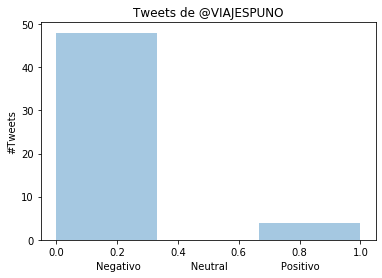

In [36]:
tw_trump_sent = anl_tweets(tw_trump, user_id)

In [37]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

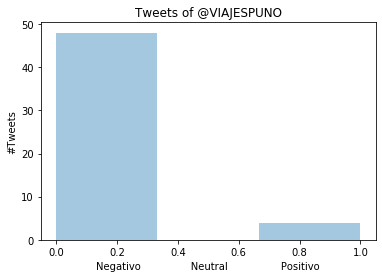

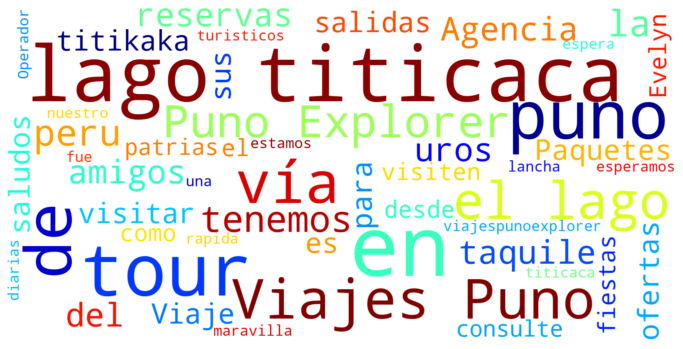

In [18]:
user_id = 'VIAJESPUNO' 
tw_viajes = list_tweets(user_id, count)
tw_viajes = clean_tweets(tw_viajes)
tw_viajes_sent = anl_tweets(tw_viajes, user_id)
word_cloud(tw_viajes)